## 各位同学好，这次作业我们来实践利用python的数据可视化

今天咱们要用到的数据还是NYSE的数据，没有数据的同学可以找班主任要哈，他那边有百度网盘~

这里展示的图片大家需要满足以下要求，每一个组图片按照以下要求给分：
1. 内容正确40%
2. 图标题、坐标轴标题清晰明了20%
3. 颜色选取清晰20% 
    > 注：对于有着不同意义的数据点要用**不同类型的点**做图例标注，避免歧义 `ax.set_prop_circle`, `sns.hls_palette`
4. 图片中信息分布合理20% 
    > 注：对于过分集中的数据采用对数坐标 `plt.gca().set_xscale`

## 图1：用饼图表示NYSE数据中2015年净利润（Net Income）最多的100家公司的行业（GICS Sector）组成（30 分）

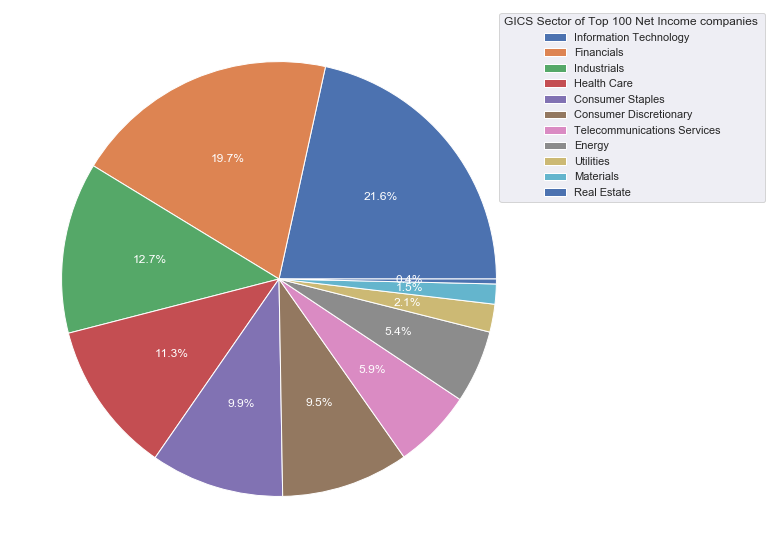

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

path = r'./fundamentals.csv'
path2 = r'./securities.csv'
df = pd.read_csv(path)
df2 = pd.read_csv(path2)
#数据筛选
df = df[df['For Year'] == 2015][['Ticker Symbol','Net Income','For Year']]
df2 = df2[['Ticker symbol','GICS Sector']]

#合并数据块
df = pd.merge(df,df2,left_on='Ticker Symbol',right_on='Ticker symbol',how = 'outer')

#s删除多余列和NA值
df = df.drop(['Ticker symbol'],axis = 1)
df = df.dropna(subset = ['Net Income'])

#筛选利润前100家公司
df = df.sort_values(by='Net Income',ascending = False)[:100]

#groupby and sum
_group = df['Net Income'].groupby( df['GICS Sector']).sum()
_group = _group.sort_values(ascending = False)

#_group.plot.pie(figsize=(12,12),autopct='%.2f',title = '',labeldistance = 1.03)

_sector = _group.index.values.tolist()
_values = _group.values.tolist()

fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct)


wedges, texts, autotexts = ax.pie(_values, autopct=lambda pct: func(pct, _values),
                                  textprops=dict(color="w"))

ax.legend(wedges, _sector,
          title="GICS Sector of Top 100 Net Income companies ",
          loc="upper center",
          bbox_to_anchor=(0.9, 0,0.5, 1))

## 图2：在一张直方图中表示不同行业（GICS Sector）的营收（total revenue）分布（30 分）

(0, 5e-12)

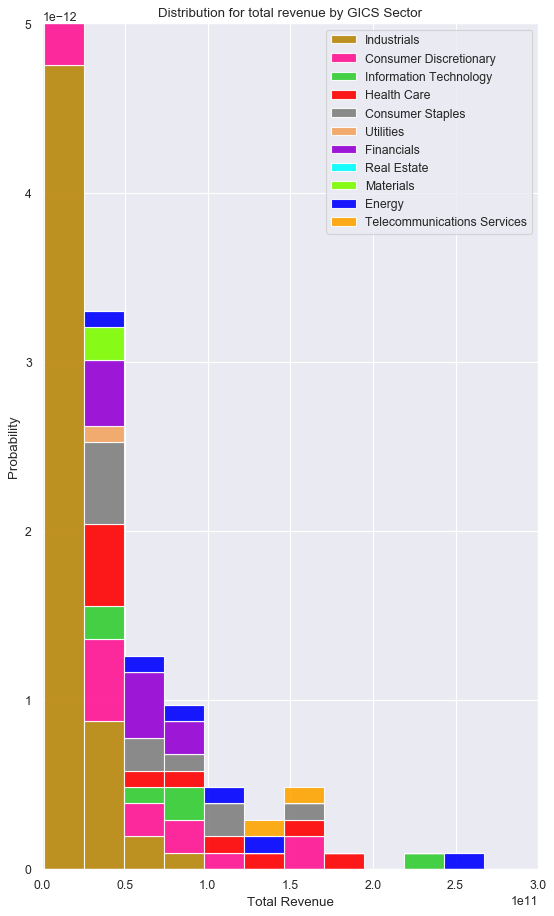

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import colors
sns.set()

path = r'./fundamentals.csv'
path2 = r'./securities.csv'
df = pd.read_csv(path)
df2 = pd.read_csv(path2)
#数据筛选
df = df[['Ticker Symbol','Total Revenue','For Year']]
df2 = df2[['Ticker symbol','GICS Sector']]

#合并数据块
df = pd.merge(df,df2,left_on='Ticker Symbol',right_on='Ticker symbol',how = 'outer')
df = df.drop(['Ticker symbol'],axis = 1)

#2015
df = df[df['For Year'] == 2015]

#print(df.head())
#行业list
sectorlist = df['GICS Sector'].unique()


plt.figure(figsize=(8,14), dpi= 80 )


#print(sectorlist)
kwargs = dict(alpha=0.9, bins=20)

#颜色
fracs = np.array(['darkgoldenrod','deeppink','limegreen','red','grey','sandybrown','darkviolet','cyan','lawngreen','blue','orange'])

#获得数据列表
nlist =[]
for each in sectorlist:
    dfx = df[df['GICS Sector']==each]
    datax = dfx['Total Revenue']
    nlist.append(datax)

#列表转换为数组
narray = np.array(nlist)
#narray.shape

#将数组带入
plt.hist(narray,**kwargs,color = fracs, label = sectorlist, density =True, stacked = True)

    
plt.gca().set(title ='Distribution for total revenue by GICS Sector',ylabel = 'Probability',xlabel = 'Total Revenue')  
plt.legend()
plt.xlim(-1,3e11)
plt.ylim(0,0.5e-11)





###重叠
#for each,color in zip(sectorlist,fracs):
#    dfx = df[df['GICS Sector']==each]
#    datax = dfx['Total Revenue'].values
    #print(datax)
   # print(color)
#    plt.hist(datax,**kwargs,color= color ,label = each,density=True, stacked=True)


#######################
#df1 = df[df['GICS Sector'] == 'Industrials' ]
#data1 = df1['Total Revenue'].values
#print(data1.max())
#print(df.head())

#N, bins, patches = plt.hist(data1, **kwargs, color='g', label='Industrials')

#fracs = N / N.max()
#norm = colors.Normalize(fracs.min(), fracs.max())
#plt.cm.viridis(norm(color))



## 图3：在一张二维散点图中表示不同行业的固定资产（Fixed Assets）/总资产（Total Assets）与盈利（Net Income）和营收(Total Revenue)的比例 （40 分）

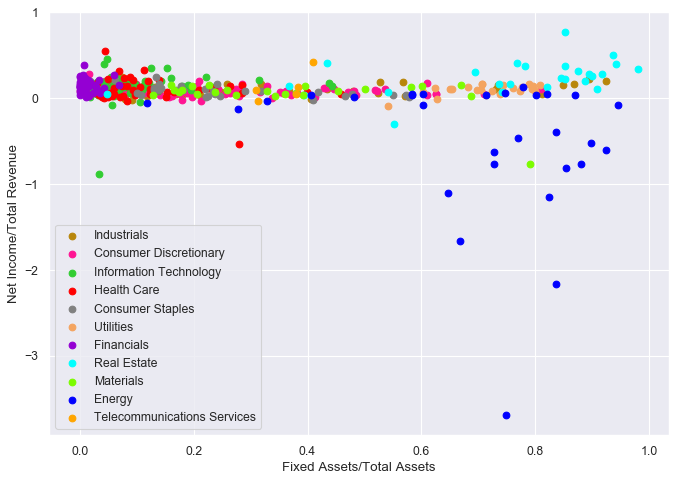

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import colors
sns.set()

path = r'./fundamentals.csv'
path2 = r'./securities.csv'
df = pd.read_csv(path)
#数据筛选
df = df[['Ticker Symbol','Net Income','Fixed Assets','Total Assets','Total Revenue','For Year']]

#2015
df = df[df['For Year'] == 2015]
df = df.dropna(subset = ['Net Income','Fixed Assets','Total Assets','Total Revenue'])

#增加FT 和 NT 比值列
df['FT'] = df['Fixed Assets']/df['Total Assets']
df['NT'] = df['Net Income']/df['Total Revenue']

#合并数据库
df2 = pd.read_csv(path2)
df2 = df2[['Ticker symbol','GICS Sector']]

#合并数据块
df = pd.merge(df,df2,left_on='Ticker Symbol',right_on='Ticker symbol',how = 'outer')
df = df.drop(['Ticker symbol'],axis = 1)
df = df.dropna()

#得到行业列表

fracs = np.array(['darkgoldenrod','deeppink','limegreen','red','grey','sandybrown','darkviolet','cyan','lawngreen','blue','orange'])
sectorlist = df['GICS Sector'].unique()


plt.figure(figsize=(10,7), dpi= 80 )

datalistx =[]
datalisty =[]
for i,sector in enumerate(sectorlist):
    datax = df[df['GICS Sector']==sector]
    datay = datax
    datax = datax['FT'].values.tolist()
    datay = datay['NT'].values.tolist()
    plt.scatter(datax,datay,c=fracs[i],label = sector)

plt.gca().set( xlabel='Fixed Assets/Total Assets', ylabel='Net Income/Total Revenue')
plt.legend()
plt.show()

